<a href="https://colab.research.google.com/github/igors96/GB_KNN_Classifier_Beer_Recipes/blob/main/beer_recipes_gb_e_knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 23)
pd.set_option("display.max_rows", None)
cerveja = pd.read_csv('/content/recipeData.csv', encoding = 'ISO 8859-1')

In [2]:
cerveja.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75.0,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60.0,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90.0,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [3]:
cerveja.shape

(16256, 23)

In [4]:
faltantes = cerveja.isnull().sum()
faltantes_percentual = (faltantes / len(cerveja['BeerID']))*100
print(faltantes_percentual)

BeerID            0.000000
Name              0.000000
URL               0.000000
Style             1.427165
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.006152
Color             0.006152
BoilSize          0.006152
BoilTime          0.006152
BoilGravity      17.421260
Efficiency        0.006152
MashThickness    53.709400
SugarScale        0.006152
BrewMethod        0.006152
PitchRate        53.660187
PrimaryTemp      34.510335
PrimingMethod    85.820620
PrimingAmount    89.314715
UserId           56.379183
dtype: float64


In [5]:
cerveja['StyleID'].value_counts()

7      2494
10     1363
86      626
134     502
4       497
30      344
132     331
129     331
170     326
175     324
12      298
6       286
15      261
92      260
162     252
111     232
39      231
114     229
145     229
68      220
45      201
65      189
25      163
94      162
26      145
20      143
85      139
21      133
75      133
115     131
144     130
155     129
5       127
37      123
58      120
24      113
19      109
31      108
72      105
22      104
113     104
23      101
105     100
116      99
81       98
87       94
160      87
167      84
59       80
27       80
56       71
157      70
148      67
63       64
169      64
109      63
171      62
40       59
14       55
120      55
150      55
54       54
108      51
11       50
137      49
103      48
135      47
29       47
9        46
124      46
51       45
176      44
43       44
143      44
71       40
44       40
159      39
67       37
163      37
32       34
8        34
34       33
28       33
112 

In [6]:
selecao = cerveja.loc[cerveja['StyleID'].isin([7,10,134,9,4,30,86,12,92,6,175,39])]

In [7]:
selecao.shape

(7271, 23)

In [8]:
selecao.drop(['BeerID', 'Name', 'URL', 'Style', 'UserId', 'PrimingMethod', 'PrimingAmount'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
selecao.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70.0,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90.0,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60.0,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [10]:
selecao.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime         float64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [11]:
selecao['SugarScale'].value_counts()

Specific Gravity    7083
Plato                188
Name: SugarScale, dtype: int64

In [12]:
selecao['BrewMethod'].value_counts()

All Grain       4709
extract         1068
BIAB            1030
Partial Mash     464
Name: BrewMethod, dtype: int64

In [13]:
selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
brew_method_encoding = pd.get_dummies(selecao['BrewMethod'])

selecao.drop('BrewMethod', axis = 1, inplace = True)

concatenado = pd.concat([selecao,brew_method_encoding], axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
concatenado.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60.0,NaN,70.0,NaN,0,NaN,NaN,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60.0,NaN,70.0,NaN,0,NaN,NaN,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70.0,1.047,79.0,NaN,0,1.0,NaN,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90.0,NaN,75.0,NaN,0,NaN,NaN,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60.0,1.058,70.0,NaN,0,NaN,21.11,1,0,0,0


In [16]:
faltantes = concatenado.isnull().sum()
faltantes_percentual = (faltantes / len(concatenado['StyleID']))*100
print(faltantes_percentual)

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity      17.012791
Efficiency        0.000000
MashThickness    54.641727
SugarScale        0.000000
PitchRate        54.256636
PrimaryTemp      33.681749
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


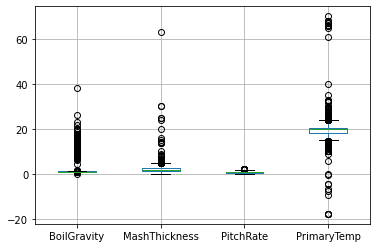

In [17]:
import matplotlib.pyplot as plt
concatenado.boxplot(column = ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'])
plt.show()

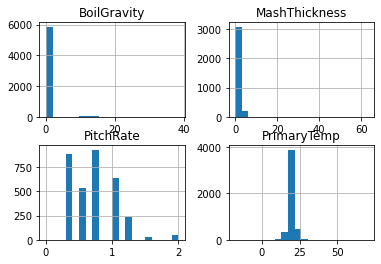

In [18]:
concatenado.hist(column = ['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp'], bins = 20)
plt.show()

In [19]:
concatenado['PitchRate'].fillna(concatenado['PitchRate'].mean(), inplace = True)
concatenado.fillna(concatenado.median(), inplace = True)

In [20]:
faltantes = concatenado.isnull().sum()
faltantes_percentual = (faltantes / len(concatenado['StyleID']))*100
print(faltantes_percentual)

StyleID          0.0
Size(L)          0.0
OG               0.0
FG               0.0
ABV              0.0
IBU              0.0
Color            0.0
BoilSize         0.0
BoilTime         0.0
BoilGravity      0.0
Efficiency       0.0
MashThickness    0.0
SugarScale       0.0
PitchRate        0.0
PrimaryTemp      0.0
All Grain        0.0
BIAB             0.0
Partial Mash     0.0
extract          0.0
dtype: float64


In [21]:
x = concatenado.drop('StyleID', axis = 1)
y = concatenado['StyleID']

In [22]:
def modelosclassificacao(a, b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    skfold = StratifiedKFold(n_splits = 5)
    x = a
    y = b
    
    normalizador = MinMaxScaler(feature_range = (0,1))
    x_norm = normalizador.fit_transform(x)
    
    logist = LogisticRegression()
    naive = GaussianNB()
    decisiontree = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    resul_logist = cross_val_score(logist, x, y, cv = skfold)
    resul_naive = cross_val_score(naive, x, y, cv = skfold)
    resul_decisiontree = cross_val_score(decisiontree, x, y, cv = skfold)
    resul_knn = cross_val_score(knn, x_norm, y, cv = skfold)
    dic_classmodels = {'Logística': resul_logist.mean(), 'Naive': resul_naive.mean(), 'Decision Tree': resul_decisiontree.mean(), 'KNN': resul_knn.mean()}
    melhor_modelo = max(dic_classmodels, key = dic_classmodels.get)
    print('Regressão Logística: ', resul_logist.mean(), 'Naive Bayes: ', resul_naive.mean(), 'Decision Tree: ', resul_decisiontree.mean(), 'KNN: ', resul_knn.mean())
    print('O melhor modelo foi:', melhor_modelo, 'com o valor: ', dic_classmodels[melhor_modelo])
                

In [23]:
modelosclassificacao(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Regressão Logística:  0.4420276332146892 Naive Bayes:  0.26309675406627997 Decision Tree:  0.5149208014861244 KNN:  0.4612831530036822
O melhor modelo foi: Decision Tree com o valor:  0.5149208014861244


In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

normalizador = MinMaxScaler(feature_range = (0,1))
X_norm = normalizador.fit_transform(x)

valores_K = np.array([3,5,7,9])
calculo_distancia = ['minkowski', 'chebyshev']
valores_p = np.array([1,2,3])
valores_grid = {'n_neighbors': valores_K, 'metric': calculo_distancia, 'p': valores_p}

modelo = KNeighborsClassifier()

gridKNN = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv = 3, n_jobs = -1)
gridKNN.fit(X_norm, y)

print('Melhor acurácia: ', gridKNN.best_score_)
print('Melhor K: ', gridKNN.best_estimator_.n_neighbors)
print('Melhor acurácia: ', gridKNN.best_estimator_.metric)
print('Melhor acurácia: ', gridKNN.best_estimator_.p)

Melhor acurácia:  0.48700293574549364
Melhor K:  7
Melhor acurácia:  minkowski
Melhor acurácia:  1


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

modelo_boost = GradientBoostingClassifier(n_estimators = 300)
skfold_boost = StratifiedKFold(n_splits = 3)
resultado_boost = cross_val_score(modelo_boost, x, y, cv = skfold_boost, n_jobs = -1)
print(resultado_boost.mean())

0.6195843531938832
